### Get the Environement Ready

In [1]:
from IPython.core.display import clear_output
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/requirements_tf_cert_exam.txt
clear_output()

In [2]:
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py
clear_output()

In [3]:
!pip install -r requirements_tf_cert_exam.txt
!pip install split_folders
clear_output()

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import random
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(f'tensorflow version : {tf.__version__}')
print(f'pandas version : {pd.__version__}')
print(f'numpy version : {np.__version__}')
print(f'scipy version : {scipy.__version__}')

tensorflow version : 2.10.0
pandas version : 1.4.2
numpy version : 1.22.4
scipy version : 1.7.3


### Download the Data

In [6]:
!wget 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip'

--2023-04-04 08:28:29--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  --.-KB/s    in 0.09s   

2023-04-04 08:28:29 (137 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [7]:
from helper_functions import unzip_untar_data

In [8]:
unzip_untar_data('jena_climate_2009_2016.csv.zip')

File extension : .zip
File extracting.......
Completed successfully


In [9]:
!ls

helper_functions.py		__pycache__
jena_climate_2009_2016.csv	requirements_tf_cert_exam.txt
jena_climate_2009_2016.csv.zip	sample_data


### Read the DataSet

In [10]:
wdf = pd.read_csv('jena_climate_2009_2016.csv')
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [11]:
sel_cols = ['Date Time','T (degC)']

In [12]:
wdf = wdf[sel_cols]
wdf.head(5)

,Date Time,T (degC)
0,01.01.2009 00:10:00,-8.02
1,01.01.2009 00:20:00,-8.41
2,01.01.2009 00:30:00,-8.51
3,01.01.2009 00:40:00,-8.31
4,01.01.2009 00:50:00,-8.27


In [13]:
wdf.columns = ['datetime','temp']
wdf.head()

,datetime,temp
0,01.01.2009 00:10:00,-8.02
1,01.01.2009 00:20:00,-8.41
2,01.01.2009 00:30:00,-8.51
3,01.01.2009 00:40:00,-8.31
4,01.01.2009 00:50:00,-8.27


In [14]:
wdf['datetime'] = pd.to_datetime(wdf['datetime'])

In [15]:
wdf.head()

,datetime,temp
0,2009-01-01 00:10:00,-8.02
1,2009-01-01 00:20:00,-8.41
2,2009-01-01 00:30:00,-8.51
3,2009-01-01 00:40:00,-8.31
4,2009-01-01 00:50:00,-8.27


In [16]:
wdf['datetime'] = pd.to_datetime(wdf['datetime'].dt.date)

In [17]:
wdf.head()

,datetime,temp
0,2009-01-01,-8.02
1,2009-01-01,-8.41
2,2009-01-01,-8.51
3,2009-01-01,-8.31
4,2009-01-01,-8.27


In [18]:
med_df = wdf.groupby('datetime')['temp'].aggregate(np.median)
med_df

datetime
2009-01-01    -6.870
2009-01-02    -3.295
2009-01-03     4.160
2009-01-04     9.455
2009-01-05    12.660
               ...  
2016-12-28     4.950
2016-12-29     3.165
2016-12-30    -2.390
2016-12-31    -3.845
2017-01-01    -4.820
Name: temp, Length: 2921, dtype: float64

In [19]:
dates = np.array(med_df.index)
temp = med_df.values

### Plot the time Series

In [20]:
from helper_functions import plot_time_series

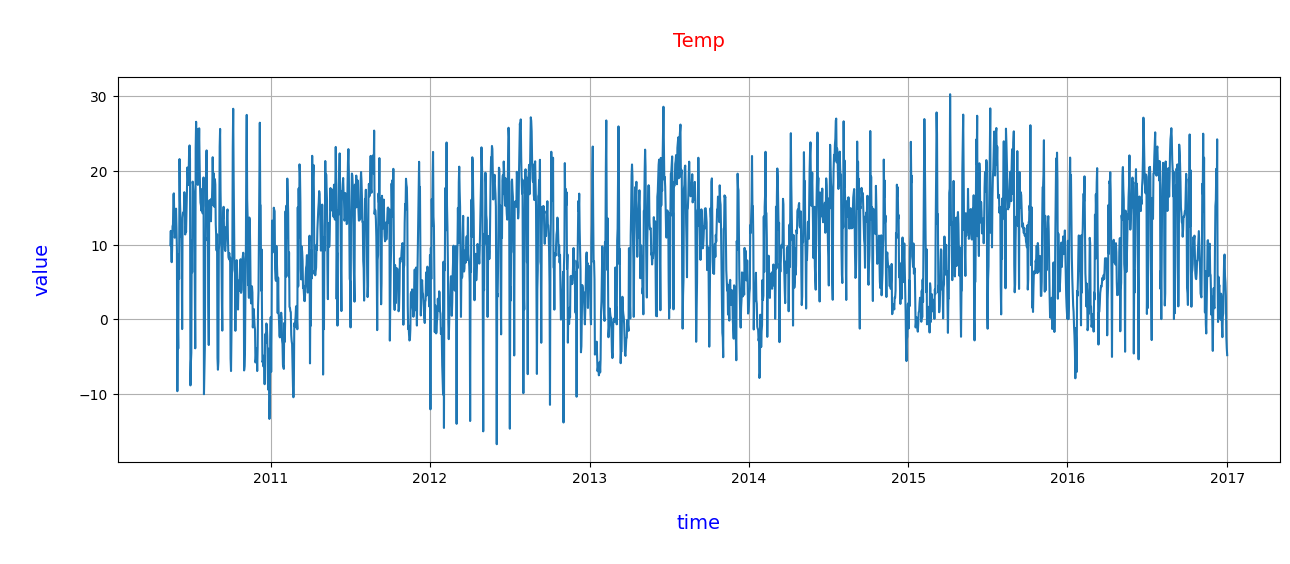

In [21]:
plot_time_series(values = temp, timesteps = dates, title = 'Temp', figsize = (15,5), offset = 500)

## Window the Dataset

Define the Global Variables

In [22]:
window = 30
horizon = 1

> window the dataset

In [23]:
from helper_functions import windowed_times_series

In [24]:
features, labels = windowed_times_series(values = temp, window = window, horizon = horizon)
features[:3], labels[:3]

window size : 30 & horizon_size : 1
number of windows returned : 2891



(array([[-6.87 , -3.295,  4.16 ,  9.455, 12.66 , 14.745, 20.21 , 19.81 ,
         21.785, 12.195,  4.1  ,  3.925, -2.475, -4.51 ,  0.105, -2.99 ,
          0.645,  2.91 ,  3.04 ,  4.13 , -2.055, -1.12 ,  0.93 ,  2.44 ,
          0.375, -3.12 , -1.3  , -2.52 , -2.16 , -2.43 ],
        [-3.295,  4.16 ,  9.455, 12.66 , 14.745, 20.21 , 19.81 , 21.785,
         12.195,  4.1  ,  3.925, -2.475, -4.51 ,  0.105, -2.99 ,  0.645,
          2.91 ,  3.04 ,  4.13 , -2.055, -1.12 ,  0.93 ,  2.44 ,  0.375,
         -3.12 , -1.3  , -2.52 , -2.16 , -2.43 , -2.165],
        [ 4.16 ,  9.455, 12.66 , 14.745, 20.21 , 19.81 , 21.785, 12.195,
          4.1  ,  3.925, -2.475, -4.51 ,  0.105, -2.99 ,  0.645,  2.91 ,
          3.04 ,  4.13 , -2.055, -1.12 ,  0.93 ,  2.44 ,  0.375, -3.12 ,
         -1.3  , -2.52 , -2.16 , -2.43 , -2.165, -3.93 ]]),
 array([-2.165, -3.93 , -0.63 ]))

In [25]:
features.shape, labels.shape

((2891, 30), (2891,))

### Split Train and Validation Sets

In [26]:
train_size = int(len(features)*0.8)
train_size

2312

In [27]:
train_features = features[:train_size]
train_labels = labels[:train_size]

val_features = features[train_size:]
val_labels = labels[train_size:]

train_features.shape, train_labels.shape, val_features.shape, val_labels.shape,

((2312, 30), (2312,), (579, 30), (579,))

### Create the Data Pipeline

In [28]:
train_ds = tf.data.Dataset.from_tensor_slices((train_features,train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_features,val_labels))

train_ds,val_ds

(<TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>,
 <TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>)

In [29]:
batch_size = 32
shuffle_size = int(len(train_features)*0.1)

batch_size, shuffle_size

(32, 231)

In [30]:
train_ds = train_ds.shuffle(int(0.1*len(train_features))).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(32).prefetch(tf.data.AUTOTUNE)

train_ds, val_ds

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 30), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 30), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Create the Model checkpoints

In [31]:
from helper_functions import create_model_checkpoint, reduce_learning_rate_callback

Model 1 : Dense Model

Dense Model

In [32]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [33]:
inputs = tf.keras.Input(shape = [window], name = 'input_layers')
x = layers.Dense(units = 124 , activation = 'relu')(inputs)
outputs = layers.Dense(units = 1, activation = 'linear')(x)

model_1 = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model_1')

model_1.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 124)               3844      
                                                                 
 dense_1 (Dense)             (None, 1)                 125       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_1 = model_1.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds),
                        callbacks = [create_model_checkpoint(model_name = model_1.name, monitor = 'val_mae'),
                                     reduce_learning_rate_callback(monitor = 'val_mae', patience = 10)])

Epoch 1/100
73/73 [==============================] - 1s 5ms/step - loss: 5.1704 - mae: 5.1704 - val_loss: 3.8725 - val_mae: 3.8725 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 3.8027 - mae: 3.8027 - val_loss: 3.9981 - val_mae: 3.9981 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - 0s 4ms/step - loss: 3.5670 - mae: 3.5670 - val_loss: 3.5828 - val_mae: 3.5828 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 0s 5ms/step - loss: 3.3715 - mae: 3.3715 - val_loss: 3.5623 - val_mae: 3.5623 - lr: 0.0010
Epoch 5/100
73/73 [==============================] - 0s 5ms/step - loss: 3.3089 - mae: 3.3089 - val_loss: 3.5066 - val_mae: 3.5066 - lr: 0.0010
Epoch 6/100
73/73 [==============================] - 0s 4ms/step - loss: 3.2437 - mae: 3.2437 - val_loss: 3.5347 - val_mae: 3.5347 - lr: 0.0010
Epoch 7/100
73/73 [==============================] - 0s 5ms/step - loss: 3.1692 - mae: 3.1692 - val_loss: 3.4853 - val_mae: 3.4853 - lr:

In [35]:
from helper_functions import plot_loss_curves

In [36]:
model_1.load_weights('checkpoints/model_1.h5')

In [37]:
model_1.evaluate(val_ds)

19/19 [==============================] - 0s 1ms/step - loss: 3.3185 - mae: 3.3185


[3.318467140197754, 3.318467140197754]

In [38]:
from helper_functions import calculate_results_regression

In [39]:
def pred_and_show(model, val_ds):

  pred = np.squeeze(model.predict(val_ds))
  y_true = [x.numpy() for x in val_ds.unbatch().map(lambda x,y : y)]
  results = calculate_results_regression(y_true = y_true, y_pred = pred)
  return results

In [40]:
results_1 = pred_and_show(model_1, val_ds)
results_1

19/19 [==============================] - 0s 2ms/step


{'mae': 3.3184671, 'mse': 17.958035, 'rmse': 4.2376924, 'mape': 272.99194}

### Model 2

_ More Dense Layers to it

In [41]:
inputs = tf.keras.Input(shape = [window], name = 'input_layers')
x = layers.Dense(units = 124 , activation = 'relu')(inputs)
x = layers.Dense(units = 64, activation = 'relu')(x)
outputs = layers.Dense(units = 1, activation = 'linear')(x)

model_2 = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model_2')

model_2.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 30)]              0         
                                                                 
 dense_2 (Dense)             (None, 124)               3844      
                                                                 
 dense_3 (Dense)             (None, 64)                8000      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,909
Trainable params: 11,909
Non-trainable params: 0
_________________________________________________________________


In [42]:
history_2 = model_2.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds),
                        callbacks = [create_model_checkpoint(model_name = model_2.name, monitor = 'val_mae'),
                                     reduce_learning_rate_callback(monitor = 'val_mae', patience = 10)])

Epoch 1/100
73/73 [==============================] - 1s 5ms/step - loss: 4.6212 - mae: 4.6212 - val_loss: 3.7084 - val_mae: 3.7084 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 1s 7ms/step - loss: 3.5029 - mae: 3.5029 - val_loss: 3.5633 - val_mae: 3.5633 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - 0s 6ms/step - loss: 3.2869 - mae: 3.2869 - val_loss: 3.5810 - val_mae: 3.5810 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 3.1629 - mae: 3.1629 - val_loss: 3.7458 - val_mae: 3.7458 - lr: 0.0010
Epoch 5/100
73/73 [==============================] - 1s 12ms/step - loss: 3.1177 - mae: 3.1177 - val_loss: 3.8412 - val_mae: 3.8412 - lr: 0.0010
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 3.1274 - mae: 3.1274 - val_loss: 3.6251 - val_mae: 3.6251 - lr: 0.0010
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: 2.9945 - mae: 2.9945 - val_loss: 3.4989 - val_mae: 3.4989 - lr

In [43]:
model_2.load_weights('checkpoints/model_2.h5')

In [44]:
results_2 = pred_and_show(model_2, val_ds)
results_2

19/19 [==============================] - 0s 1ms/step


{'mae': 3.2923882, 'mse': 18.100767, 'rmse': 4.2544994, 'mape': 257.99716}

### Model 3 

- Conv layers

In [45]:
inputs = layers.Input(shape=[30], name='input_layer')

x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Conv1D(filters = 124, kernel_size=5, padding ='causal', activation ='relu')(x)
x = layers.Conv1D(filters = 64, kernel_size=5, padding ='causal', activation ='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(units=16, activation='relu')(x)
outputs = layers.Dense(units=1, activation='linear')(x)

model_3 = tf.keras.Model(inputs = inputs, outputs = outputs, name='model_3')

model_3.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae'])

In [46]:
history_3 = model_3.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds),
                        callbacks = [create_model_checkpoint(model_name = model_3.name, monitor = 'val_mae'),
                                     reduce_learning_rate_callback(monitor = 'val_mae', patience = 15)])

Epoch 1/100
73/73 [==============================] - 1s 6ms/step - loss: 4.7745 - mae: 4.7745 - val_loss: 3.9822 - val_mae: 3.9822 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 0s 4ms/step - loss: 3.4972 - mae: 3.4972 - val_loss: 3.4634 - val_mae: 3.4634 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 3.3520 - mae: 3.3520 - val_loss: 3.4970 - val_mae: 3.4970 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 0s 4ms/step - loss: 3.2581 - mae: 3.2581 - val_loss: 3.5437 - val_mae: 3.5437 - lr: 0.0010
Epoch 5/100
73/73 [==============================] - 0s 5ms/step - loss: 3.1760 - mae: 3.1760 - val_loss: 3.4356 - val_mae: 3.4356 - lr: 0.0010
Epoch 6/100
73/73 [==============================] - 0s 7ms/step - loss: 3.0916 - mae: 3.0916 - val_loss: 3.4310 - val_mae: 3.4310 - lr: 0.0010
Epoch 7/100
73/73 [==============================] - 0s 5ms/step - loss: 3.0679 - mae: 3.0679 - val_loss: 3.5606 - val_mae: 3.5606 - lr:

In [47]:
model_3.load_weights('checkpoints/model_3.h5')

In [48]:
results_3 = pred_and_show(model_3, val_ds)
results_3

19/19 [==============================] - 0s 2ms/step


{'mae': 3.2734618, 'mse': 18.124834, 'rmse': 4.257327, 'mape': 265.8706}

Model : 4

- LSTM

In [49]:
inputs = layers.Input(shape=[30], name='input_layer')

x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(units = 124, activation = 'relu', return_sequences = True)(x)
x = layers.LSTM(units = 64, activation = 'relu')(x)
x = layers.Dense(units=16, activation='relu')(x)
outputs = layers.Dense(units=1, activation='linear')(x)

model_4 = tf.keras.Model(inputs = inputs, outputs = outputs, name='model_4')

model_4.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae'])

In [50]:
history_4 = model_4.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds),
                        callbacks = [create_model_checkpoint(model_name = model_4.name, monitor = 'val_mae'),
                                     reduce_learning_rate_callback(monitor = 'val_mae', patience = 15)])

Epoch 1/100
73/73 [==============================] - 4s 12ms/step - loss: 5.1775 - mae: 5.1775 - val_loss: 3.6580 - val_mae: 3.6580 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 1s 8ms/step - loss: 3.5202 - mae: 3.5202 - val_loss: 3.4202 - val_mae: 3.4202 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - 1s 8ms/step - loss: 3.2638 - mae: 3.2638 - val_loss: 3.4377 - val_mae: 3.4377 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 0s 7ms/step - loss: 3.0881 - mae: 3.0881 - val_loss: 3.4552 - val_mae: 3.4552 - lr: 0.0010
Epoch 5/100
73/73 [==============================] - 0s 6ms/step - loss: 2.9658 - mae: 2.9658 - val_loss: 3.3472 - val_mae: 3.3472 - lr: 0.0010
Epoch 6/100
73/73 [==============================] - 0s 7ms/step - loss: 2.8254 - mae: 2.8254 - val_loss: 3.2989 - val_mae: 3.2989 - lr: 0.0010
Epoch 7/100
73/73 [==============================] - 0s 6ms/step - loss: 2.7603 - mae: 2.7603 - val_loss: 3.3527 - val_mae: 3.3527 - lr

In [51]:
model_4.load_weights('checkpoints/model_4.h5')

In [52]:
results_4 = pred_and_show(model_4, val_ds)
results_4

19/19 [==============================] - 1s 3ms/step


{'mae': 3.2361193, 'mse': 17.97262, 'rmse': 4.239413, 'mape': 266.97278}

### Compare the Models

In [53]:
results = pd.DataFrame({model_1.name : results_1,
                        model_2.name : results_2,
                        model_3.name : results_3,
                        model_4.name : results_4}).transpose()

results.sort_values(by = 'mae', inplace = True)
results

,mae,mse,rmse,mape
model_4,3.236119,17.972620,4.239413,266.972778
model_3,3.273462,18.124834,4.257327,265.870605
model_2,3.292388,18.100767,4.254499,257.997162
model_1,3.318467,17.958035,4.237692,272.991943


### Save the best Model

In [57]:
model_4.save('best_model.h5')

In [58]:
loaded_model = tf.keras.models.load_model('best_model.h5')
loaded_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 30)]              0         
                                                                 
 lambda_1 (Lambda)           (None, 1, 30)             0         
                                                                 
 lstm (LSTM)                 (None, 1, 124)            76880     
                                                                 
 lstm_1 (LSTM)               (None, 64)                48384     
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 126,321
Trainable params: 126,321
Non-trainab

In [59]:
loaded_model.evaluate(val_ds)

19/19 [==============================] - 0s 3ms/step - loss: 3.2361 - mae: 3.2361


[3.2361185550689697, 3.2361185550689697]

-- End of the notebook